In [149]:
import torch
import numpy as np
from maskrcnn_benchmark.structures.bounding_box import BoxList

pred = torch.load('SG_predictions_small_batch.pth')

In [150]:
def refine_boxlist(boxlist):
    size = boxlist.size
    mode = boxlist.mode
    
    bbox = boxlist.bbox
    pred_scores = boxlist.get_field('pred_scores')
    pred_labels = boxlist.get_field('pred_labels')
    pair_obj = boxlist.get_field('rel_pair_idxs')
    rel_labels = boxlist.get_field('pred_rel_labels')
    rel_scores = boxlist.get_field('pred_rel_scores')
    
    rel_scores = rel_scores.numpy()
    rel_labels = rel_labels.numpy()
    pair_obj = pair_obj.numpy()
    pred_scores = pred_scores.numpy()
    pred_labels = pred_labels.numpy()
    bbox = bbox.numpy()
    
    # Remove detected object with lower score
    idx_low_pred_labels = np.where(pred_scores < 0.1)[0]
    idx_high_pred_labels = np.asarray([x for x in range(len(pred_scores)) if x not in list(idx_low_pred_labels)])
    
    # Remove detected relation corresponding with low score detected object
    idx_pairs_contain_low_labels = [idx for idx, row in enumerate(pair_obj) if row[0] in idx_low_pred_labels or row[1] in idx_low_pred_labels]
    idx_pairs_contain_high_labels = [x for x in range(len(rel_scores)) if x not in idx_pairs_contain_low_labels]
    
    pairs_contain_high_labels = pair_obj[idx_pairs_contain_high_labels,:]
    rel_labels_contain_high_labels = rel_labels[idx_pairs_contain_high_labels]
    rel_scores_contain_high_labels = rel_scores[idx_pairs_contain_high_labels,:]
    pred_labels_contain_high_labels = pred_labels[idx_high_pred_labels]
    pred_scores_contain_high_labels = pred_scores[idx_high_pred_labels]
    bbox_contain_high_labels = bbox[idx_high_pred_labels,:]
    
    # Reindex object in the pairs object
    temp = list(idx_high_pred_labels)
    for i in range(pairs_contain_high_labels.shape[0]):
        row = pairs_contain_high_labels[i]
        pairs_contain_high_labels[i][0] = temp.index(row[0])
        pairs_contain_high_labels[i][1] = temp.index(row[1])
        
    # Should remove detected relation with lower score
    # DO IT HERE
    
    newboxlist = BoxList(bbox=bbox_contain_high_labels, image_size=size, mode=mode)
    newboxlist.add_field('pred_scores', pred_scores_contain_high_labels)
    newboxlist.add_field('pred_labels', pred_labels_contain_high_labels)
    newboxlist.add_field('rel_labels', rel_labels_contain_high_labels)
    newboxlist.add_field('rel_scores', rel_scores_contain_high_labels)
    newboxlist.add_field('rel_pair_idxs', pairs_contain_high_labels)
    
    return newboxlist

In [151]:
a = pred[0]
b = refine_boxlist(a)

In [153]:
b.extra_fields

{'pred_scores': array([0.45718014, 0.24590422, 0.16269062, 0.15663984, 0.22249444,
        0.5077811 , 0.10413557, 0.18673794, 0.8830153 , 0.10473966,
        0.4437839 , 0.15646657, 0.32901996, 0.24742295, 0.1509515 ,
        0.53761274, 0.12137583, 0.17254926], dtype=float32),
 'pred_labels': array([ 90, 145,  76,  91, 134,  65,  45,  22, 135,  99,  22, 105, 114,
        114, 145, 145, 146,  99]),
 'rel_labels': array([31, 31, 31, 31, 31, 31, 20, 31, 20, 20, 20, 31, 20, 31, 43, 20, 29,
        29, 29, 31, 29, 31, 29, 31, 29, 31, 31, 29, 29, 29, 31, 31, 31, 29,
        29, 31, 31, 31, 29, 29, 31, 29, 29, 29, 29, 29, 29, 29, 31, 29, 29,
        29, 29,  8, 29, 29, 29, 31, 29, 29,  8, 29, 31, 20, 29, 31, 29, 29,
        31, 29, 29, 29, 31, 29, 31, 31, 29, 31, 29, 29, 31, 29, 20, 31, 31,
        29, 20, 31, 29, 31, 29, 31, 29, 29, 31, 29, 31, 31, 29, 20, 31, 29,
        29, 20, 29, 29, 29, 29, 20, 29, 20, 31, 31, 29, 29,  8, 20, 31, 29,
        29, 31, 29, 29, 50, 29, 29, 29, 20, 31, 29,

## Get fields of each result

In [77]:
pred[0].fields()

['pred_labels',
 'pred_scores',
 'rel_pair_idxs',
 'pred_rel_scores',
 'pred_rel_labels']

In [2]:
pred

{0: BoxList(num_boxes=80, image_width=800, image_height=600, mode=xyxy),
 1: BoxList(num_boxes=80, image_width=800, image_height=600, mode=xyxy),
 2: BoxList(num_boxes=80, image_width=600, image_height=800, mode=xyxy),
 3: BoxList(num_boxes=80, image_width=600, image_height=600, mode=xyxy),
 4: BoxList(num_boxes=80, image_width=1000, image_height=562, mode=xyxy),
 5: BoxList(num_boxes=80, image_width=1000, image_height=398, mode=xyxy),
 6: BoxList(num_boxes=80, image_width=800, image_height=600, mode=xyxy),
 7: BoxList(num_boxes=80, image_width=600, image_height=821, mode=xyxy),
 8: BoxList(num_boxes=80, image_width=1000, image_height=562, mode=xyxy),
 9: BoxList(num_boxes=80, image_width=903, image_height=600, mode=xyxy)}

In [115]:
pred[0].size

(800, 600)

In [117]:
pred[0].mode

'xyxy'

In [118]:
pred[0].triplet_extra_fields

[]

In [119]:
pred[0].extra_fields

{'pred_labels': tensor([ 90, 145,  76,  91, 100, 145, 134,  99, 135,  65,  76,  45,  22, 145,
         135,  78,  26,  99, 145, 115,  76, 145, 105,  76,  22,  99, 105, 104,
         114,  38, 145, 145, 105,  90,  85, 114, 105,  44, 114,  96, 136,  22,
         134, 145, 146, 134, 115,  38,  42, 134,  26,  99,  76,  26,  38, 145,
         114, 135,  76, 114,  71,  22,  76, 145,  75,  90, 148, 148, 124, 145,
         146, 114,  76,  42, 134,  31,  99, 105,  90,  26]),
 'pred_scores': tensor([0.4572, 0.2459, 0.1627, 0.1566, 0.0418, 0.0204, 0.2225, 0.0689, 0.0058,
         0.5078, 0.0053, 0.1041, 0.1867, 0.0176, 0.8830, 0.0277, 0.0071, 0.1047,
         0.0061, 0.0075, 0.0562, 0.0421, 0.0104, 0.0166, 0.4438, 0.0119, 0.0123,
         0.0147, 0.0371, 0.0353, 0.0053, 0.0065, 0.1565, 0.0563, 0.0491, 0.3290,
         0.0525, 0.0047, 0.2474, 0.0021, 0.0248, 0.0421, 0.0226, 0.1510, 0.0068,
         0.0284, 0.0084, 0.0037, 0.0071, 0.0526, 0.0074, 0.0022, 0.0364, 0.0147,
         0.0072, 0.5376, 0.0

Here only 4 fields: 
1. `pred_labels` for object detection along with its `pred_scores`
2. `rel_pair_idxs` stands for the object interaction between pairs of object. Note the the pairs object is the index of the bbox detected in the result
3. `pred_rel_labels` is the relation detection of corresponding pairs of object above and along with all probabilities of relations in `pred_rel_scores`

In [78]:
bbox = pred[0].bbox
bbox.shape

torch.Size([80, 4])

In [79]:
pred_scores = pred[0].get_field('pred_scores')
pred_scores

tensor([0.4572, 0.2459, 0.1627, 0.1566, 0.0418, 0.0204, 0.2225, 0.0689, 0.0058,
        0.5078, 0.0053, 0.1041, 0.1867, 0.0176, 0.8830, 0.0277, 0.0071, 0.1047,
        0.0061, 0.0075, 0.0562, 0.0421, 0.0104, 0.0166, 0.4438, 0.0119, 0.0123,
        0.0147, 0.0371, 0.0353, 0.0053, 0.0065, 0.1565, 0.0563, 0.0491, 0.3290,
        0.0525, 0.0047, 0.2474, 0.0021, 0.0248, 0.0421, 0.0226, 0.1510, 0.0068,
        0.0284, 0.0084, 0.0037, 0.0071, 0.0526, 0.0074, 0.0022, 0.0364, 0.0147,
        0.0072, 0.5376, 0.0296, 0.0016, 0.0589, 0.0177, 0.0082, 0.0042, 0.0211,
        0.0796, 0.0105, 0.0377, 0.0593, 0.0278, 0.0533, 0.0328, 0.1214, 0.0079,
        0.0150, 0.0077, 0.0160, 0.0072, 0.1725, 0.0100, 0.0139, 0.0043])

In [80]:
pred_labels = pred[0].get_field('pred_labels')
pred_labels

tensor([ 90, 145,  76,  91, 100, 145, 134,  99, 135,  65,  76,  45,  22, 145,
        135,  78,  26,  99, 145, 115,  76, 145, 105,  76,  22,  99, 105, 104,
        114,  38, 145, 145, 105,  90,  85, 114, 105,  44, 114,  96, 136,  22,
        134, 145, 146, 134, 115,  38,  42, 134,  26,  99,  76,  26,  38, 145,
        114, 135,  76, 114,  71,  22,  76, 145,  75,  90, 148, 148, 124, 145,
        146, 114,  76,  42, 134,  31,  99, 105,  90,  26])

In [81]:
pair_obj = pred[0].get_field('rel_pair_idxs')
pair_obj

tensor([[55, 14],
        [14,  6],
        [ 1, 14],
        ...,
        [47, 39],
        [77, 64],
        [39, 75]])

In [82]:
rel_scores = pred[0].get_field('pred_rel_scores')
rel_scores

tensor([[3.8234e-01, 8.3579e-06, 2.6012e-09,  ..., 2.4144e-11, 2.3585e-11,
         1.7240e-09],
        [1.5238e-01, 2.0869e-04, 1.7092e-09,  ..., 3.9923e-11, 2.6751e-11,
         5.3346e-08],
        [3.5145e-01, 5.5337e-06, 2.1444e-09,  ..., 1.5494e-11, 1.4900e-11,
         1.0860e-09],
        ...,
        [1.0000e+00, 7.5492e-15, 8.9535e-17,  ..., 1.0685e-16, 2.3471e-17,
         5.6238e-14],
        [1.0000e+00, 7.3750e-14, 7.0943e-18,  ..., 1.2458e-17, 1.2808e-18,
         4.2760e-15],
        [1.0000e+00, 2.0472e-14, 8.3177e-17,  ..., 5.1965e-15, 3.2865e-16,
         1.3194e-13]])

In [83]:
rel_labels = pred[0].get_field('pred_rel_labels')
rel_labels

tensor([31, 31, 31,  ..., 31,  1, 22])

In [85]:
print(f"pair obj shape: {pair_obj.shape}")
print(f"rel score shape: {rel_scores.shape}")
print(f"rel label shape: {rel_labels.shape}")
print(f"pred score shape: {pred_scores.shape}")
print(f"pred label shape: {pred_labels.shape}")


pair obj shape: torch.Size([6320, 2])
rel score shape: torch.Size([6320, 51])
rel label shape: torch.Size([6320])
pred score shape: torch.Size([80])
pred label shape: torch.Size([80])


## Get relation with high score

In [86]:
rel_scores = rel_scores.numpy()
rel_labels = rel_labels.numpy()
pair_obj = pair_obj.numpy()
pred_scores = pred_scores.numpy()
pred_labels = pred_labels.numpy()
bbox = bbox.numpy()

In [87]:
idx_low_pred_labels = np.where(pred_scores < 0.1)[0]
pred_scores

array([0.45718014, 0.24590422, 0.16269062, 0.15663984, 0.04178688,
       0.0203868 , 0.22249444, 0.06885172, 0.00577517, 0.5077811 ,
       0.00525984, 0.10413557, 0.18673794, 0.01762734, 0.8830153 ,
       0.0276713 , 0.00708181, 0.10473966, 0.00610674, 0.00751613,
       0.05622897, 0.04207039, 0.01038455, 0.01661166, 0.4437839 ,
       0.01186992, 0.01225952, 0.01467619, 0.03713553, 0.03532203,
       0.00531431, 0.00648412, 0.15646657, 0.05630802, 0.04906832,
       0.32901996, 0.0524755 , 0.0047349 , 0.24742295, 0.00206983,
       0.02482157, 0.04207766, 0.02256564, 0.1509515 , 0.00683824,
       0.02838754, 0.00842342, 0.0037445 , 0.00714657, 0.05260959,
       0.007364  , 0.00222222, 0.03638369, 0.01471552, 0.00720969,
       0.53761274, 0.02956224, 0.00164201, 0.05893787, 0.01766514,
       0.00823951, 0.00422045, 0.02112324, 0.07960837, 0.01052003,
       0.03767479, 0.05927598, 0.02776524, 0.0532772 , 0.03275522,
       0.12137583, 0.00786562, 0.01495412, 0.00769032, 0.01601

In [127]:
idx_high_pred_labels = np.asarray([x for x in range(len(pred_scores)) if x not in list(idx_low_pred_labels)])
print(idx_low_pred_labels.shape)
print(idx_high_pred_labels.shape)

(62,)
(18,)


In [135]:
idx_high_pred_labels

[0, 1, 2, 3, 6, 9, 11, 12, 14, 17, 24, 32, 35, 38, 43, 55, 70, 76]

In [128]:
idx_pairs_contain_low_labels = [idx for idx, row in enumerate(pair_obj) if row[0] in idx_low_pred_labels or row[1] in idx_low_pred_labels]
# for i in range(pair_obj.shape[0]):
#     row = pair_obj[i]
#     if row[0] in idx_low_pred_labels or row[1] in idx_low_pred_labels:
#         idx_pairs_contain_low_labels.append(i)
idx_pairs_contain_high_labels = [x for x in range(len(rel_scores)) if x not in idx_pairs_contain_low_labels]

In [137]:
pairs_contain_high_labels = pair_obj[idx_pairs_contain_high_labels,:]
rel_labels_contain_high_labels = rel_labels[idx_pairs_contain_high_labels]
rel_scores_contain_high_labels = rel_scores[idx_pairs_contain_high_labels,:]
pred_labels_contain_high_labels = pred_labels[idx_high_pred_labels]
pred_scores_contain_high_labels = pred_scores[idx_high_pred_labels]
bbox_contain_high_labels = bbox[idx_high_pred_labels,:]
idx_high_pred_labels = list(idx_high_pred_labels)

In [138]:
idx_high_pred_labels

[0, 1, 2, 3, 6, 9, 11, 12, 14, 17, 24, 32, 35, 38, 43, 55, 70, 76]

In [139]:
pred_labels_contain_high_labels

array([ 90, 145,  76,  91, 134,  65,  45,  22, 135,  99,  22, 105, 114,
       114, 145, 145, 146,  99])

In [140]:
temp = list(idx_high_pred_labels)
for i in range(pairs_contain_high_labels.shape[0]):
    row = pairs_contain_high_labels[i]
    pairs_contain_high_labels[i][0] = temp.index(row[0])
    pairs_contain_high_labels[i][1] = temp.index(row[1])
    

In [142]:
pairs_contain_high_labels.shape

(306, 2)

In [143]:
rel_scores_contain_high_labels.shape

(306, 51)

In [131]:
rel_scores_c = rel_scores[:,1:]
rel_scores_c.shape

(6320, 50)

In [138]:
np.sum(refine_rel_labels == rel_labels)

6320

Somehow the `rel_labels` is not correct with the `rel_scores`, for example below

In [21]:
rel_pred_scores = [rel_scores[idx, rel_labels[idx]] for idx in range(len(rel_labels))]

In [24]:
np.argmin(rel_pred_scores)

6318

In [32]:
np.argmax(rel_scores[6318])

0

In [31]:
rel_labels[6318]

1

Refine the result

In [135]:
refine_rel_labels = np.asarray([np.argmax(rel_scores_c[x]) for x in range(len(rel_labels))]) + 1

In [136]:
np.unique(refine_rel_labels)

array([ 1,  8, 20, 21, 22, 23, 29, 30, 31, 33, 43, 48, 50])

In [40]:
np.unique(rel_labels)

array([ 1,  8, 20, 21, 22, 23, 29, 30, 31, 33, 43, 48, 50])

In [42]:
idx_rel = np.where(refine_rel_labels != 0)[0]
idx_rel

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 15, 17, 20, 21,
       23, 32, 33, 34])

In [52]:
refine_rel_labels_avai = refine_rel_labels[idx_rel]
rel_scores_avai = rel_scores[idx_rel, :]
pair_obj_avai = pair_obj[idx_rel, :]

refine_rel_labels_avai

array([31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31])

In [53]:
pair_obj_avai

array([[55, 14],
       [14,  6],
       [ 1, 14],
       [43, 14],
       [70, 14],
       [63, 14],
       [20, 14],
       [58, 14],
       [14, 49],
       [34, 14],
       [21, 14],
       [14, 45],
       [29, 14],
       [69, 14],
       [62, 14],
       [13, 14],
       [14, 74],
       [72, 14],
       [54, 14],
       [31, 14],
       [30, 14]])

In [62]:
idx_pred_scores_desceding = np.argsort(pred_scores)[::-1]
pred_scores_des = pred_scores[idx_pred_scores_desceding]
pred_labels_des = pred_labels[idx_pred_scores_desceding]

In [75]:
pred_labels

array([ 90, 145,  76,  91, 100, 145, 134,  99, 135,  65,  76,  45,  22,
       145, 135,  78,  26,  99, 145, 115,  76, 145, 105,  76,  22,  99,
       105, 104, 114,  38, 145, 145, 105,  90,  85, 114, 105,  44, 114,
        96, 136,  22, 134, 145, 146, 134, 115,  38,  42, 134,  26,  99,
        76,  26,  38, 145, 114, 135,  76, 114,  71,  22,  76, 145,  75,
        90, 148, 148, 124, 145, 146, 114,  76,  42, 134,  31,  99, 105,
        90,  26])

In [74]:
pred_scores

array([0.45718014, 0.24590422, 0.16269062, 0.15663984, 0.04178688,
       0.0203868 , 0.22249444, 0.06885172, 0.00577517, 0.5077811 ,
       0.00525984, 0.10413557, 0.18673794, 0.01762734, 0.8830153 ,
       0.0276713 , 0.00708181, 0.10473966, 0.00610674, 0.00751613,
       0.05622897, 0.04207039, 0.01038455, 0.01661166, 0.4437839 ,
       0.01186992, 0.01225952, 0.01467619, 0.03713553, 0.03532203,
       0.00531431, 0.00648412, 0.15646657, 0.05630802, 0.04906832,
       0.32901996, 0.0524755 , 0.0047349 , 0.24742295, 0.00206983,
       0.02482157, 0.04207766, 0.02256564, 0.1509515 , 0.00683824,
       0.02838754, 0.00842342, 0.0037445 , 0.00714657, 0.05260959,
       0.007364  , 0.00222222, 0.03638369, 0.01471552, 0.00720969,
       0.53761274, 0.02956224, 0.00164201, 0.05893787, 0.01766514,
       0.00823951, 0.00422045, 0.02112324, 0.07960837, 0.01052003,
       0.03767479, 0.05927598, 0.02776524, 0.0532772 , 0.03275522,
       0.12137583, 0.00786562, 0.01495412, 0.00769032, 0.01601

In [97]:
idx_highscore = np.argwhere(pred_scores>0.1)

In [98]:
idx_highscore

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 6],
       [ 9],
       [11],
       [12],
       [14],
       [17],
       [24],
       [32],
       [35],
       [38],
       [43],
       [55],
       [70],
       [76]])

In [99]:
pred_labels[idx_highscore]

array([[ 90],
       [145],
       [ 76],
       [ 91],
       [134],
       [ 65],
       [ 45],
       [ 22],
       [135],
       [ 99],
       [ 22],
       [105],
       [114],
       [114],
       [145],
       [145],
       [146],
       [ 99]])

# READ IMAGE FROM URL

In [3]:
from PIL import Image
import requests
from io import BytesIO

def read_img_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# READ INFO JSON

In [2]:
import json

with open('datasets/vg/VG-SGG-dicts-with-attri.json', 'r') as f:
    info_dict = json.load(f)

# READ DATASET

In [154]:
import torch
from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.data import make_data_loader

In [155]:
config_file = 'configs/e2e_relation_X_101_32_8_FPN_1x.yaml'
cfg.merge_from_file(config_file)
cfg.TEST.IMS_PER_BATCH = 1
#cfg.freeze()
data_loaders_val = make_data_loader(cfg, mode="test", is_distributed=False)
data_loaders_val = data_loaders_val[0]

In [156]:
dataset = data_loaders_val.dataset

In [157]:
img_info = dataset.get_img_info(1)

In [158]:
img_info

{'width': 500,
 'url': 'https://cs.stanford.edu/people/rak248/VG_100K/2343728.jpg',
 'height': 375,
 'image_id': 2343728,
 'coco_id': 113370,
 'flickr_id': 9390261584}

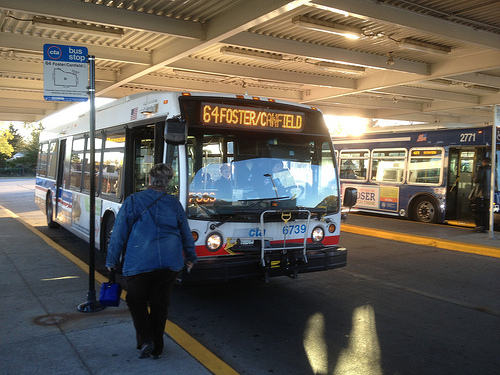

In [159]:
img = read_img_from_url(img_info['url'])
img

In [88]:
gt = dataset.get_groundtruth(0, evaluation=True)

In [94]:
gt.fields()

['labels', 'attributes', 'relation', 'relation_tuple']

In [95]:
gt.get_field('labels')

tensor([ 38,  65,  85,  99, 135, 136, 145, 146, 149])

In [104]:
label_decode = [info_dict["idx_to_label"][str(x.numpy())] for x in gt.get_field('labels')]

In [105]:
label_decode

['door',
 'house',
 'number',
 'pole',
 'train',
 'tree',
 'window',
 'windshield',
 'woman']

In [107]:
gt.get_field('relation')

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 29,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 20,  0,  0],
        [ 0, 29,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 31,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 31,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [108]:
gt.get_field('relation_tuple')

tensor([[ 7,  4, 31],
        [ 6,  4, 31],
        [ 4,  6, 20],
        [ 1,  4, 29],
        [ 5,  1, 29]])

In [109]:
gt.get_field('attributes')

tensor([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [21,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [116]:
sample_relation = gt.get_field('relation_tuple').numpy()
sample_label = gt.get_field('labels').numpy()
sample_relation

array([[ 7,  4, 31],
       [ 6,  4, 31],
       [ 4,  6, 20],
       [ 1,  4, 29],
       [ 5,  1, 29]])

In [120]:
def decode_relation(relation_array, label_array, info_dict):
    # relation_array size n_relation x 3 (obj1, obj2, rel) --> encoded to number
    result = []
    for i in range(relation_array.shape[0]):
        rel = relation_array[i]
        obj1 = info_dict['idx_to_label'][str(label_array[rel[0]])]
        obj2 = info_dict['idx_to_label'][str(label_array[rel[1]])]
        con = info_dict['idx_to_predicate'][str(rel[2])]
        result.append([obj1, obj2, con])
    return result

In [121]:
decode_relation(sample_relation, sample_label, info_dict)

[['windshield', 'train', 'on'],
 ['window', 'train', 'on'],
 ['train', 'window', 'has'],
 ['house', 'train', 'near'],
 ['tree', 'house', 'near']]

In [139]:
pred_labels_decode = [info_dict["idx_to_label"][str(x)] for x in pred_labels]

In [140]:
pred_labels_decode

['people',
 'window',
 'light',
 'person',
 'post',
 'window',
 'track',
 'pole',
 'train',
 'house',
 'light',
 'fence',
 'building',
 'window',
 'train',
 'man',
 'car',
 'pole',
 'window',
 'sign',
 'light',
 'window',
 'roof',
 'light',
 'building',
 'pole',
 'roof',
 'rock',
 'sidewalk',
 'door',
 'window',
 'window',
 'roof',
 'people',
 'number',
 'sidewalk',
 'roof',
 'face',
 'sidewalk',
 'plant',
 'tree',
 'building',
 'track',
 'window',
 'windshield',
 'track',
 'sign',
 'door',
 'engine',
 'track',
 'car',
 'pole',
 'light',
 'car',
 'door',
 'window',
 'sidewalk',
 'train',
 'light',
 'sidewalk',
 'lamp',
 'building',
 'light',
 'window',
 'letter',
 'people',
 'wire',
 'wire',
 'street',
 'window',
 'windshield',
 'sidewalk',
 'light',
 'engine',
 'track',
 'coat',
 'pole',
 'roof',
 'people',
 'car']

# Image in a batch

Have a look at a batch so can create the image format like them. The transform step is in the below section

The images is the structure format ImageList. Look at `maskrcnn_benchmark.structures.image_list.ImageList`

In [160]:
batch = next(iter(data_loaders_val))

In [161]:
images, targets, image_ids = batch

In [53]:
images.tensors.shape

torch.Size([1, 3, 608, 800])

In [59]:
type(image_ids)

tuple

In [165]:
images.tensors.shape

torch.Size([1, 3, 608, 800])

In [49]:
dataset.get_img_info(11)

{'width': 500,
 'url': 'https://cs.stanford.edu/people/rak248/VG_100K/2343716.jpg',
 'height': 322,
 'image_id': 2343716,
 'coco_id': None,
 'flickr_id': 8705646184}

In [61]:
from __future__ import division

import torch


class ImageList(object):
    """
    Structure that holds a list of images (of possibly
    varying sizes) as a single tensor.
    This works by padding the images to the same size,
    and storing in a field the original sizes of each image
    """

    def __init__(self, tensors, image_sizes):
        """
        Arguments:
            tensors (tensor)
            image_sizes (list[tuple[int, int]])
        """
        self.tensors = tensors
        self.image_sizes = image_sizes

    def to(self, *args, **kwargs):
        cast_tensor = self.tensors.to(*args, **kwargs)
        return ImageList(cast_tensor, self.image_sizes)


def to_image_list(tensors, size_divisible=0):
    """
    tensors can be an ImageList, a torch.Tensor or
    an iterable of Tensors. It can't be a numpy array.
    When tensors is an iterable of Tensors, it pads
    the Tensors with zeros so that they have the same
    shape
    """
    if isinstance(tensors, torch.Tensor) and size_divisible > 0:
        tensors = [tensors]

    if isinstance(tensors, ImageList):
        return tensors
    elif isinstance(tensors, torch.Tensor):
        # single tensor shape can be inferred
        if tensors.dim() == 3:
            tensors = tensors[None]
        assert tensors.dim() == 4
        image_sizes = [tensor.shape[-2:] for tensor in tensors]
        return ImageList(tensors, image_sizes)
    elif isinstance(tensors, (tuple, list)):
        max_size = tuple(max(s) for s in zip(*[img.shape for img in tensors]))

        # TODO Ideally, just remove this and let me model handle arbitrary
        # input sizs
        if size_divisible > 0:
            import math

            stride = size_divisible
            max_size = list(max_size)
            max_size[1] = int(math.ceil(max_size[1] / stride) * stride)
            max_size[2] = int(math.ceil(max_size[2] / stride) * stride)
            max_size = tuple(max_size)

        batch_shape = (len(tensors),) + max_size
        batched_imgs = tensors[0].new(*batch_shape).zero_()
        for img, pad_img in zip(tensors, batched_imgs):
            pad_img[: img.shape[0], : img.shape[1], : img.shape[2]].copy_(img)

        image_sizes = [im.shape[-2:] for im in tensors]

        return ImageList(batched_imgs, image_sizes)
    else:
        raise TypeError("Unsupported type for to_image_list: {}".format(type(tensors)))


In [62]:
a = images.tensors
a.shape

torch.Size([1, 3, 608, 800])

In [63]:
a_iml = to_image_list(a)

In [74]:
a_iml.image_sizes

[torch.Size([608, 800])]

# Transform in the dataset

Look at `maskrcnn_benchmark > data > trnasforms > build.py`

In [ ]:
min_size = cfg.INPUT.MIN_SIZE_TEST # 600
max_size = cfg.INPUT.MAX_SIZE_TEST # 1000

to_bgr255 = cfg.INPUT.TO_BGR255 # True
normalize_transform = T.Normalize(
    mean=cfg.INPUT.PIXEL_MEAN, std=cfg.INPUT.PIXEL_STD, to_bgr255=to_bgr255
)

transform = T.Compose(
    [
        T.Resize(min_size, max_size),
        T.ToTensor(),
        normalize_transform,
    ]
)

# Ground truth vs Prediction

1. Need to have image_id to get the image
2. Need resize the prediction to the original size

In [ ]:
groundtruths = []
for image_id, prediction in enumerate(predictions):
    img_info = dataset.get_img_info(image_id)
    image_width = img_info["width"]
    image_height = img_info["height"]
    # recover original size which is before transform
    predictions[image_id] = prediction.resize((image_width, image_height))

    gt = dataset.get_groundtruth(image_id, evaluation=True)
    groundtruths.append(gt)